In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#похідна сигмоїдної функції
def sigmoid_derivative(x):
    return np.exp(-x) / (1 + np.exp(-x))

In [67]:
data1 = [0.3, 0.1, 0.4, 0.5, 0.3, 0.1, 0.2, -0.1, -0.3]
data2 = [-0.4, 0.1, 0.1, 0.2, -0.2, 0.3]
data3 = [0.1, -0.4]

weight_1 = np.array(data1).reshape((3, 3))
weight_2 = np.array(data2).reshape((3, 2))
weight_3 = np.array(data3).reshape((2, 1))

print("Initial weights:\nW1:\n", weight_1, "\nW2:\n", weight_2, "\nW3:\n", weight_3)

Initial weights:
W1:
 [[ 0.3  0.1  0.4]
 [ 0.5  0.3  0.1]
 [ 0.2 -0.1 -0.3]] 
W2:
 [[-0.4  0.1]
 [ 0.1  0.2]
 [-0.2  0.3]] 
W3:
 [[ 0.1]
 [-0.4]]


In [68]:
#Вхідні вектори
x_train = np.array([[0.45, 0.3, 0.15], [0.6, 0.2, 0.9], [0.35, 0.45, 0.5]])
#Вихідні вектори
y_train = np.array([[0.75], [0.15], [0.2]])
print("Input Vectors (x_train):")
for i, x in enumerate(x_train, start=1):
    print(f"Sample {i}: {x}")

print("\nOutput Vectors (y_train):")
for i, y in enumerate(y_train, start=1):
    print(f"Sample {i}: {y[0]}")

Input Vectors (x_train):
Sample 1: [0.45 0.3  0.15]
Sample 2: [0.6 0.2 0.9]
Sample 3: [0.35 0.45 0.5 ]

Output Vectors (y_train):
Sample 1: 0.75
Sample 2: 0.15
Sample 3: 0.2


In [69]:
epochs = 5000
learning_rate = 0.25
errors = []

In [70]:
for epoch in range(epochs):
    #Пряме поширення
    hidden1 = sigmoid(np.dot(x_train, weight_1))
    hidden2 = sigmoid(np.dot(hidden1, weight_2))
    output = sigmoid(np.dot(hidden2, weight_3))

    error = y_train - output
    mean_error = np.mean(np.abs(error))
    errors.append(mean_error)

    #Зворотне поширення
    delta_out = error * sigmoid_derivative(output)
    delta_hidden2 = np.dot(delta_out, weight_3.T) * sigmoid_derivative(hidden2)
    delta_hidden1 = np.dot(delta_hidden2, weight_2.T) * sigmoid_derivative(hidden1)

    #Оновлення ваг
    weight_3 += learning_rate * np.dot(hidden2.T, delta_out)
    weight_2 += learning_rate * np.dot(hidden1.T, delta_hidden2)
    weight_1 += learning_rate * np.dot(x_train.T, delta_hidden1)

print("Trained weights:\nW1:\n", weight_1, "\nW2:\n", weight_2, "\nW3:\n", weight_3)

print(f"\nFinal mean error: {mean_error}")


Trained weights:
W1:
 [[   4.6041311  -449.2782129     5.17601366]
 [  -3.29045831 -321.16364308   -2.07414484]
 [ 201.51652242  608.77945517  163.03098915]] 
W2:
 [[-12.1536621    3.28673114]
 [-96.22658457  16.99671085]
 [-10.19819146   2.0456756 ]] 
W3:
 [[ 1.77598904]
 [-0.5502687 ]]

Final mean error: 0.25506268962103457


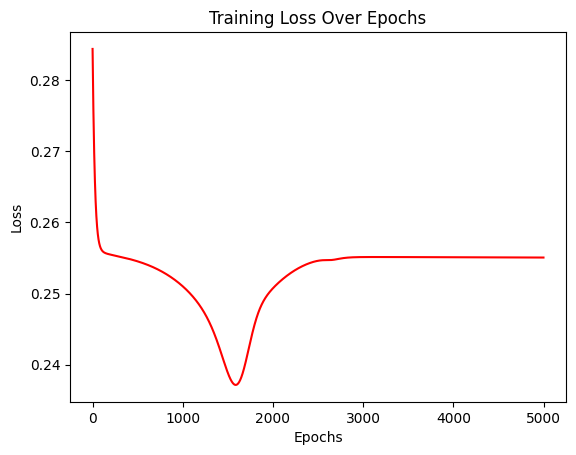

In [71]:
#Графік помилки
plt.plot(errors, color='r')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [72]:
#Для перевірки різниці 
def forward(x, weight_1, weight_2, weight_3):
    hidden1 = sigmoid(np.dot(x, weight_1))
    hidden2 = sigmoid(np.dot(hidden1, weight_2))
    output = sigmoid(np.dot(hidden2, weight_3))
    return output

print("Difference between target and given:")
print("Target output:\n", y_train)
print("Given output:\n", forward(x_train, weight_1, weight_2, weight_3))

Difference between target and given:
Target output:
 [[0.75]
 [0.15]
 [0.2 ]]
Given output:
 [[0.36641622]
 [0.36580207]
 [0.36580207]]
